<a href="https://colab.research.google.com/github/gmbeddard/data-science-project-code/blob/main/Group1_Saha_FinalCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOMEWORK 4
Team Saha: Gabby Beddard, Camille Gimilaro, Gargi Gurung, Anika Agarwal, Akshita Jain, Kritika Sahni

Part Assignments

*   Identify relevant data: Gargi, Camille, Gabby
* Convert SAS to excel file + make datasets useable on Collab/in Python (section 1): Gabby
* Initial review of dfs (sections 2-4): Camille, Gabby
* Extract relevant data points (section 5): Gabby, Camille
* Clean data: Camille, Gabby
* Visuals: Gabby
* SKlearn decision tree: Camille
* Logistic regression: Camille
* PyCaret decision tree: Camille
* Analysis of models: Camille
* HW4 write-up: Gabby, Camille




## Kyle's helpful hints

Final Project:
* Final Project: Everyone
* Final Write-Up: Everyone
* Birth control vs. irregular period graph - are most people with endometriosis on birth control, and is that causing our period regularity vs. endo diagnosis graph to show ppl with endo having more regular periods?
* Age at first live birth vs. diagnosis - does having endometriosis affect the age you get pregnant?

In [ ]:
# https://www.kaggle.com/datasets/shreyasvedpathak/pcos-dataset
# https://github.com/poldrack/nhanes


# If you do all three models, then don't do the PCOS
# For each dataset:
# Load in the CSV

# PCOS Y/N
# All the other variables

# NHANES also has a endomitrosis category

# https://www.medrxiv.org/content/10.1101/2021.07.28.21261303v1

# Exploratory
# Graph of age (histogram)
# Graph of blood group


# Assumptions
# 1 Assuming these patients came from India and from a given state
# 2 Assume demographics at the state level

# Data Cleaning
# Add columns 50% of people make more than X IR

# Randomly assign people into wealth categories amoung the group you have.

# Model
# Logistic regression (binary outcome) Y/N
# All of the predictors


# Limitations
# I made so many assumptions b/c this is an understudied population


In [ ]:
# Write out data_df and metadata_df

# EDA & Data Cleaning
# Filter to a population you are interested in
# Filter out some variables you don't want - clinical relevance - this doesn't matter
# Feature selection in sklearn - find those relevant features - https://scikit-learn.org/stable/modules/feature_selection.html
# Histogram of demographic variables (boxplot/violinplot)
# Add to your limitations - who is missing? Representive survey
# If needed join by SEQN (this is the main file) - https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/P_DR1IFF.htm#SEQN

# Model
# Create a model of the outcome of interest (endometriosis)
# Create a new variable - Outcome / Disease (HPB, COPD, ... , ENDO)
# Pairwise correlations
# Binary variable 0/1
# Two models:
# Logistic regression - think about the predictor
# For HW4 - do the above.
# SciKit Learn - Decison tree https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# If time: PyCaret - Decision tree (optimal hyperparameters)

# Bring it back to the population - which is easier to interpret?
# Cite this - we are cutting edge :)
# https://www.medrxiv.org/content/10.1101/2021.07.28.21261303v1

# Limitation - Using too many variables (correlated)
# Multiple modelling (Lasso/Ridge - resistant to many variables)
# VIF - variable inflation factor ()


# 1. Wrangling NHANES data
Read in pre-created .xlsx files of data from my Github repo to this document. (if you want to know how I got the NHANES .XPT files from their website to my github in .XLSX form, see the Scratch Work Section).

Create 4 aptly named data frames

Convert all .xlsx files to data frames

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import BytesIO
import seaborn as sns

# List of GitHub URLs pointing to the raw .xlsx files
urls = [
    'https://github.com/gmbeddard/data-science-project/raw/main/nhanes_reproductive.xlsx',
    'https://github.com/gmbeddard/data-science-project/raw/main/nhanes_demographics.xlsx',
    'https://github.com/gmbeddard/data-science-project/raw/main/nhanes_depression.xlsx',
    'https://github.com/gmbeddard/data-science-project/raw/main/nhanes_blood_pressure.xlsx'
]

# Variable names for each DataFrame corresponding to each URL
dataframe_names = ['df_reproductive', 'df_demographics', 'df_depression', 'df_blood_pressure']

# Loop through each URL and fetch the corresponding .xlsx file
for url, name in zip(urls, dataframe_names):
    # Send a GET request to fetch the raw content of the .xlsx file
    response = requests.get(url)
    response.raise_for_status()  # This will raise an error if the download fails

    # Use BytesIO to open the response content as a file
    data = BytesIO(response.content)

    # Read the .xlsx file using pandas and assign it to the corresponding variable
    globals()[name] = pd.read_excel(data)

## (Ignore) Scratch Work: How I got the .xlsx files that i uploaded to my github

Check if user has already completed this step to save time

Convert NHANES .XPT files to pandas data frames for data manipulation

Import those data into excel .xlsx documents for easy viewing

In [ ]:
'''
# install xport if not already installed :)
!pip install pandas
!pip install xport    # very janky method; do not recommend; near impossible to recreate
'''

'\n# install xport if not already installed :)\n!pip install pandas\n!pip install xport    # very janky method; do not recommend; near impossible to recreate\n'

In [ ]:
'''
import pandas as pd
import xport
import os

# Checking
# List of file paths to check
files = ['nhanes_reproductive.xlsx', 'nhanes_demographics.xlsx',
         'nhanes_depression.xlsx', 'nhanes_blood_pressure.xlsx']

# Iterate over each file in the list
for file in files:
    if not os.path.exists(file):
        # converting reproductive health .xpt file to excel
        # .XPT file from: https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire&CycleBeginYear=2005
        with open('RHQ_D.XPT', 'rb') as repro:
            df_reproductive = xport.to_dataframe(repro)
        df_reproductive.to_excel("nhanes_reproductive.xlsx", index=False)

        # converting demographics .xpt file to excel
        # .XPT file from: https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Demographics&CycleBeginYear=2005
        with open('DEMO_D.XPT', 'rb') as demo:
            df_demographics = xport.to_dataframe(demo)
        df_demographics.to_excel("nhanes_demographics.xlsx", index=False)

        # converting depression screening .xpt file to excel
        # .XPT file from: https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire&CycleBeginYear=2005
        with open('DPQ_D.XPT', 'rb') as depr:
            df_depression = xport.to_dataframe(depr)
        df_depression.to_excel("nhanes_depression.xlsx", index=False)

        # converting blood pressure .xpt file to excel
        # .XPT file from: https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire&CycleBeginYear=2005
        with open('BPQ_D.XPT', 'rb') as bp:
            df_blood_pressure = xport.to_dataframe(bp)
        df_blood_pressure.to_excel("nhanes_blood_pressure.xlsx", index=False)
    else:
        pass
  '''

'\nimport pandas as pd\nimport xport\nimport os\n\n# Checking\n# List of file paths to check\nfiles = [\'nhanes_reproductive.xlsx\', \'nhanes_demographics.xlsx\',\n         \'nhanes_depression.xlsx\', \'nhanes_blood_pressure.xlsx\']\n\n# Iterate over each file in the list\nfor file in files:\n    if not os.path.exists(file):\n        # converting reproductive health .xpt file to excel\n        # .XPT file from: https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire&CycleBeginYear=2005\n        with open(\'RHQ_D.XPT\', \'rb\') as repro:\n            df_reproductive = xport.to_dataframe(repro)\n        df_reproductive.to_excel("nhanes_reproductive.xlsx", index=False)\n\n        # converting demographics .xpt file to excel\n        # .XPT file from: https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Demographics&CycleBeginYear=2005\n        with open(\'DEMO_D.XPT\', \'rb\') as demo:\n            df_demographics = xport.to_dataframe(demo)\n        df_dem

# 2. View .head() data

In [ ]:
df_reproductive.head()

,SEQN,RHQ010,RHQ020,RHQ031,RHD042,RHQ051,RHQ060,RHQ070,RHD080,RHQ131,...,RHQ586U,RHQ596,RHQ598,RHQ600,RHQ602Q,RHQ602U,RHQ740,RHQ750A,RHQ750B,RHQ750C
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,11.0,NaN,1.0,NaN,5.0,NaN,NaN,NaN,1.0,...,1.0,1.0,44.0,1.0,4.0,1.0,2.0,NaN,NaN,NaN
2,31133,12.0,NaN,1.0,NaN,2.0,NaN,NaN,14.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
3,31137,12.0,NaN,1.0,NaN,1.0,NaN,NaN,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,31139,12.0,NaN,1.0,NaN,2.0,NaN,NaN,20.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN


In [ ]:
df_demographics.head()

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,DMQMILIT,...,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANG,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA
0,31127,4,2,2.0,1,0,11.0,12.0,3,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,6434.950248,6571.396373,2,44
1,31128,4,2,1.0,2,11,132.0,132.0,4,NaN,...,2.0,2.0,1.0,2.0,2.0,1.0,9081.700761,8987.041810,1,52
2,31129,4,2,2.0,1,15,189.0,190.0,4,NaN,...,2.0,2.0,1.0,2.0,2.0,1.0,5316.895215,5586.719481,1,51
3,31130,4,2,2.0,2,85,NaN,NaN,3,2.0,...,2.0,2.0,NaN,NaN,NaN,NaN,29960.839509,34030.994786,2,46
4,31131,4,2,2.0,2,44,535.0,536.0,4,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,26457.708180,26770.584605,1,48


In [ ]:
df_depression.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df_blood_pressure.head()

,SEQN,BPQ020,BPQ030,BPQ040A,BPQ050A,BPQ060,BPQ070,BPQ080,BPQ090A,BPQ090B,BPQ090C,BPQ090D,BPQ100A,BPQ100B,BPQ100C,BPQ100D
0,31130,2,NaN,NaN,NaN,1.0,9.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31131,1,1.0,1.0,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31132,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,31133,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31134,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# 3. View .tail() data

In [ ]:
df_reproductive.tail()

,SEQN,RHQ010,RHQ020,RHQ031,RHD042,RHQ051,RHQ060,RHQ070,RHD080,RHQ131,...,RHQ586U,RHQ596,RHQ598,RHQ600,RHQ602Q,RHQ602U,RHQ740,RHQ750A,RHQ750B,RHQ750C
3592,41465,13.0,NaN,1.0,NaN,2.0,NaN,NaN,34.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
3593,41466,13.0,NaN,2.0,7.0,NaN,50.0,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3594,41467,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3595,41468,14.0,NaN,2.0,7.0,NaN,48.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3596,41474,14.0,NaN,2.0,9.0,NaN,15.0,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN


In [ ]:
df_demographics.tail()

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,DMQMILIT,...,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANG,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA
10343,41470,4,2,2.0,1,0,2.0,3.0,3,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,16946.852220,17306.191799,2,46
10344,41471,4,2,1.0,1,12,148.0,149.0,4,NaN,...,2.0,2.0,1.0,2.0,2.0,1.0,6283.305550,6602.173657,1,52
10345,41472,4,2,2.0,1,34,410.0,411.0,3,1.0,...,2.0,2.0,1.0,2.0,2.0,1.0,67347.579152,69747.141506,1,48
10346,41473,4,2,2.0,1,21,255.0,255.0,1,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,19913.008976,21737.794301,1,55
10347,41474,4,2,2.0,2,16,200.0,200.0,4,NaN,...,2.0,2.0,1.0,2.0,2.0,1.0,6174.551667,6487.262494,1,47


In [ ]:
df_depression.tail()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100
5329,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5330,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,1.0
5331,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5332,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5333,41473,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df_blood_pressure.tail()

,SEQN,BPQ020,BPQ030,BPQ040A,BPQ050A,BPQ060,BPQ070,BPQ080,BPQ090A,BPQ090B,BPQ090C,BPQ090D,BPQ100A,BPQ100B,BPQ100C,BPQ100D
6134,41468,2,NaN,NaN,NaN,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,NaN,1.0,1.0
6135,41469,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6136,41472,1,2.0,2.0,NaN,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6137,41473,2,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6138,41474,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 4. View .shape() of each 4 data frames

In [ ]:
df_reproductive.shape

(3597, 85)

In [ ]:
df_demographics.shape

(10348, 43)

In [ ]:
df_depression.shape

(5334, 11)

In [ ]:
df_blood_pressure.shape

(6139, 16)

# 5. Initial Data Cleaning
Extract columns of variables we want to include in model. Variables we're considering putting in model:

From df_reproductive
*   RHQ360: Have you been told by a doctor you have endometriosis? (1 yes, 2 no)
*   RHD143: Are you currently pregnant? (1 yes, 2 no, 7 refuse, 9 don't know)
*   RHQ131: Have you ever been pregnant?
*   RHD080: days since last period (# days)
*   RHQ031: had regular period in past 12 months? (1 yes, 2 no, 7 refuse, 9 don't know)

From df_demographics
* RIDAGEMN: age in months
* RIDRETH1: race/ethinicity (1 - mexican american, 2 - other hispanic, 3 - non-hispanic white, 4 - non-hispanic black, 5 - other/multiracial)
* INDFMPIR: Family PIR (PIR < 1 - family income less than poverty line; PIR == 1 - family income equals poverty line; PIR > 1 - family income greater than poverty line)
* WTINT2YR: weight

From df_depression
* DPQ020 (0 - not at all, 1 - several days, 2 more than half, 3 - every day, 7 - refused, 9 - dont know)

From df_blood_pressure
* BPQ020 (1 - yes, 2 - no, 7 - refused, 9 - don'tknow)

Extract these from above dataframes, merge these new data frames based on SEQN number to get plotable materials?





## Select columns we want

In [ ]:
# REPRODUCTIVE DATASET
# Select only the specified columns
columns_needed_reproductive = ['SEQN', 'RHQ360', 'RHQ131', 'RHD143','RHD080', 'RHQ031']
df_reproductive_cleaned = pd.DataFrame(df_reproductive[columns_needed_reproductive])
print(df_reproductive_cleaned)


# DEMOGRAPHICS DATASET
# Select only the specified columns
columns_needed_demographics = ['SEQN', 'RIDAGEMN','WTINT2YR'] #'RIDRETH1','INDFMPIR'
df_demographics_cleaned = pd.DataFrame(df_demographics[columns_needed_demographics])
print(df_demographics_cleaned)


# DEPRESSION DATASET
# Select only the specified columns
columns_needed_depression = ['SEQN','DPQ020']
df_depression_cleaned = pd.DataFrame(df_depression[columns_needed_depression])
print(df_depression_cleaned)


# BLOOD PRESSURE DATASET
# Select only the specified columns
columns_needed_bp = ['SEQN', 'BPQ020']
df_bp_cleaned = pd.DataFrame(df_blood_pressure[columns_needed_bp])
print(df_bp_cleaned)

       SEQN  RHQ360  RHQ131  RHD143  RHD080  RHQ031
0     31130     NaN     NaN     NaN     NaN     NaN
1     31131     1.0     1.0     2.0     NaN     1.0
2     31133     NaN     2.0     NaN    14.0     1.0
3     31137     NaN     2.0     NaN     3.0     1.0
4     31139     NaN     2.0     NaN    20.0     1.0
...     ...     ...     ...     ...     ...     ...
3592  41465     NaN     2.0     NaN    34.0     1.0
3593  41466     NaN     2.0     NaN     NaN     2.0
3594  41467     NaN     NaN     NaN     NaN     NaN
3595  41468     NaN     1.0     NaN     NaN     2.0
3596  41474     NaN     2.0     NaN     NaN     2.0

[3597 rows x 6 columns]
        SEQN  RIDAGEMN      WTINT2YR
0      31127      11.0   6434.950248
1      31128     132.0   9081.700761
2      31129     189.0   5316.895215
3      31130       NaN  29960.839509
4      31131     535.0  26457.708180
...      ...       ...           ...
10343  41470       2.0  16946.852220
10344  41471     148.0   6283.305550
10345  41472     4

## Merge data frames based on SEQN

In [ ]:
merged_df = pd.merge(df_reproductive_cleaned, df_demographics_cleaned, on='SEQN', how='outer')
merged_df = pd.merge(merged_df, df_depression_cleaned, on='SEQN', how='outer')
merged_df = pd.merge(merged_df, df_bp_cleaned, on='SEQN', how='outer')

print(merged_df.head())
merged_df.shape

    SEQN  RHQ360  RHQ131  RHD143  RHD080  RHQ031  RIDAGEMN      WTINT2YR  \
0  31130     NaN     NaN     NaN     NaN     NaN       NaN  29960.839509   
1  31131     1.0     1.0     2.0     NaN     1.0     535.0  26457.708180   
2  31133     NaN     2.0     NaN    14.0     1.0     193.0   5635.221296   
3  31137     NaN     2.0     NaN     3.0     1.0     178.0   5576.468045   
4  31139     NaN     2.0     NaN    20.0     1.0     217.0   5675.705534   

   DPQ020  BPQ020  
0     NaN     2.0  
1     0.0     1.0  
2     NaN     2.0  
3     NaN     NaN  
4     0.0     1.0  


(10348, 10)

## Remove NaN values

In [ ]:
dropped_df= merged_df.dropna()
print(dropped_df.head())
dropped_df.shape

     SEQN  RHQ360  RHQ131  RHD143  RHD080  RHQ031  RIDAGEMN       WTINT2YR  \
9   31153     2.0     1.0     2.0    21.0     1.0     528.0   41246.554983   
11  31160     2.0     1.0     2.0    14.0     1.0     474.0  101878.330771   
19  31186     2.0     1.0     2.0    18.0     1.0     553.0   19238.363275   
28  31205     2.0     1.0     2.0    17.0     1.0     523.0   23957.751716   
51  31268     2.0     1.0     2.0    19.0     1.0     480.0   41274.649594   

    DPQ020  BPQ020  
9      1.0     1.0  
11     0.0     2.0  
19     0.0     2.0  
28     1.0     2.0  
51     1.0     2.0  


(666, 10)

# 6. Visualizations of Data


1.   PIR vs. Age Diagnosed with Endo
2. Race vs. Endometriosis diagnosis (pie chart)
3. Irregular Period vs. Endometriosis Diagnosis
4. Times Pregnant with Endo



## 6.1. PIR vs. Age of Diagnosis Visualization

### Data Preparation & Further Cleaning

In [ ]:
# plotting PIR vs. age diagnosed with endo
# plotting PIR ('INDFMPIR') vs. age diagnosed ('RHQ370')
columns_age_diagnosed = ['SEQN', 'RHQ370']
df_age_diagnosed = df_reproductive[columns_age_diagnosed]
#print(df_age_diagnosed)

columns_pir = ['SEQN', 'INDFMPIR']
df_pir = df_demographics[columns_pir]
#print(df_pir)

merged_df_age_pir = pd.merge(df_age_diagnosed, df_pir, on='SEQN', how='outer')
#print(merged_df_age_pir)

#drop NaN values from merged df
merged_df_age_pir_cleaned = merged_df_age_pir.dropna(subset=['RHQ370', 'INDFMPIR'])

# remove refused ("777") or don't know ("999") age values
filtered_merged_df_age_pir_cleaned = merged_df_age_pir_cleaned[~merged_df_age_pir_cleaned['RHQ370'].isin([777, 999])]
filtered_merged_df_age_pir_cleaned = filtered_merged_df_age_pir_cleaned[~filtered_merged_df_age_pir_cleaned['INDFMPIR'].isin([0, 5])]
print(filtered_merged_df_age_pir_cleaned)

       SEQN  RHQ370  INDFMPIR
1     31131    18.0      4.65
34    31213    39.0      1.05
93    31386    25.0      1.81
116   31452    22.0      3.20
138   31518    31.0      2.35
...     ...     ...       ...
3348  40720    18.0      4.26
3429  40985    40.0      3.88
3488  41157    23.0      0.84
3578  41414    19.0      4.81
3581  41428    30.0      2.07

[65 rows x 3 columns]


### 6.1a.   PIR vs. Age Diagnosed with Endo - Scatterplot


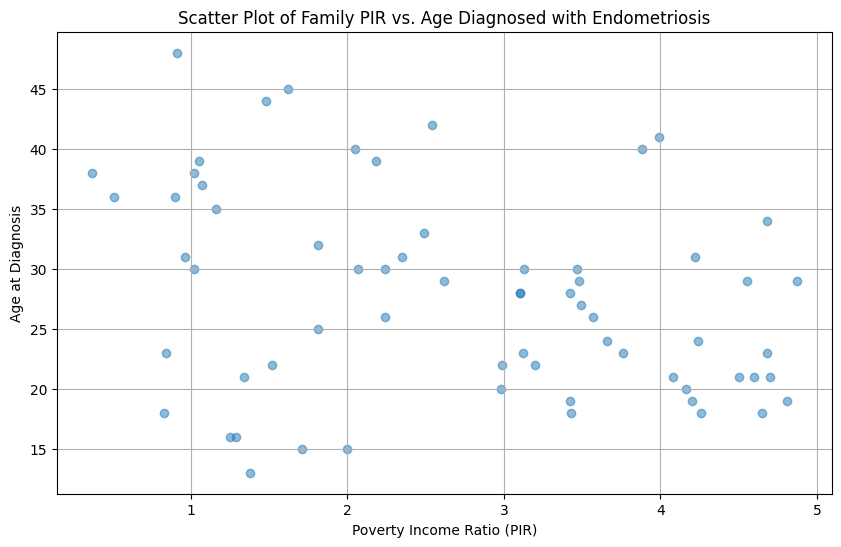

In [ ]:
# ScatterPlot
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.scatter(filtered_merged_df_age_pir_cleaned['INDFMPIR'], filtered_merged_df_age_pir_cleaned['RHQ370'], alpha=0.5)  # Plot scatter plot
plt.title('Scatter Plot of Family PIR vs. Age Diagnosed with Endometriosis')  # Title of the plot
plt.xlabel('Poverty Income Ratio (PIR)')  # X-axis label
plt.ylabel('Age at Diagnosis')  # Y-axis label
plt.grid(True)  # Enable grid for better readability
plt.show()  # Display the plot

### 6.1b. PIR vs. Age Diagnosed with Endo - Boxplot


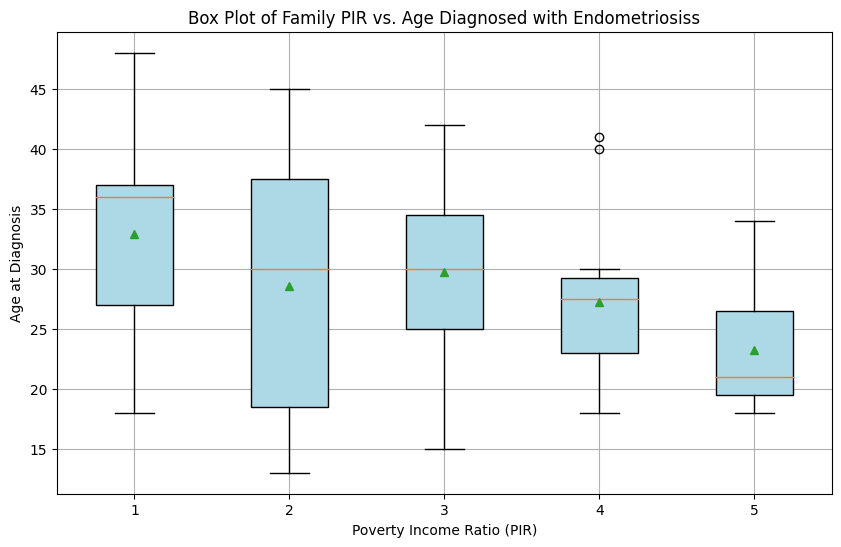

In [ ]:
#BoxPlot
groups = filtered_merged_df_age_pir_cleaned.groupby(pd.cut(filtered_merged_df_age_pir_cleaned['INDFMPIR'], bins=[0, 1, 2, 3, 4, 5], labels=[1, 2, 3, 4, 5], right=False))['RHQ370'].apply(list).values

plt.figure(figsize=(10, 6))  # Set figure size
boxplot = plt.boxplot(groups, patch_artist=True, positions=[1, 2, 3, 4, 5], showmeans=True)

# Customizing box colors
colors = ['lightblue'] * len(groups)
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
#sns.boxplot(x='INDFMPIR', y='RHQ370', data=filtered_merged_df_age_pir_cleaned)

plt.title('Box Plot of Family PIR vs. Age Diagnosed with Endometriosiss')  # Title of the plot
plt.xlabel('Poverty Income Ratio (PIR)')  # X-axis label
plt.ylabel('Age at Diagnosis')  # Y-axis label

# Limit and set specific tick labels directly if known
plt.xlim(0.5, 5.5)  # Setting limits around your known data points
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=[1, 2, 3, 4, 5])  # Manual specification

plt.grid(True)  # Add grid for better readability
plt.show()  # Display the plot

## 6.2. Race vs. Endometriosis Diagnosis Visualization

### Data Preparation & Further Cleaning

In [ ]:
# plotting Race vs. Y/N diagnosed with endo
# plotting Race ('RIDRETH1') vs. Y/N diagnosed ('RHQ360')
columns_diagnosed = ['SEQN', 'RHQ360']
df_diagnosed = df_reproductive[columns_diagnosed]
#print(df_diagnosed)

columns_race = ['SEQN', 'RIDRETH1']
df_race = df_demographics[columns_race]
#print(df_race)

merged_df_race_diagnosis = pd.merge(df_diagnosed, df_race, on='SEQN', how='outer')
#print(merged_df_age_pir)

#drop NaN values from merged df
merged_df_race_diagnosis_cleaned = merged_df_race_diagnosis.dropna(subset=['RHQ360', 'RIDRETH1'])

# remove refused ("7") or don't know ("9") diagnosis values
filtered_merged_df_race_diagnosis_cleaned = merged_df_race_diagnosis_cleaned[~merged_df_race_diagnosis_cleaned['RHQ360'].isin([7, 9])]
print(filtered_merged_df_race_diagnosis_cleaned)

       SEQN  RHQ360  RIDRETH1
1     31131     1.0         4
8     31152     2.0         1
9     31153     2.0         5
11    31160     2.0         3
18    31183     2.0         3
...     ...     ...       ...
3582  41434     2.0         1
3584  41438     2.0         1
3586  41447     2.0         3
3587  41449     2.0         3
3590  41459     2.0         3

[1471 rows x 3 columns]


### 6.2a. Pie Chart - Percentage of Race Diagnosed with Endometriosis

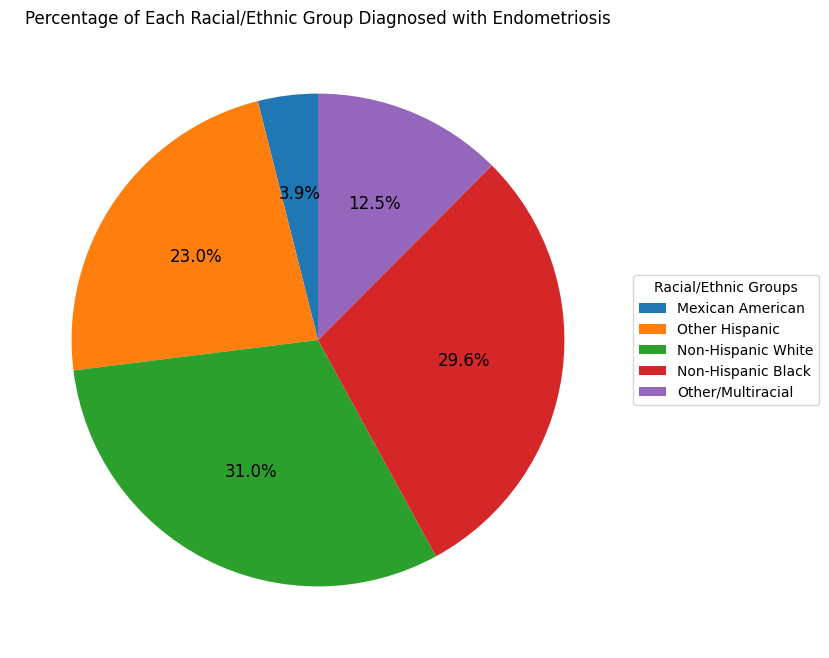

In [ ]:
# Calculate diagnosed counts and total counts per group
diagnosed_counts = filtered_merged_df_race_diagnosis_cleaned[filtered_merged_df_race_diagnosis_cleaned['RHQ360'] == 1].groupby('RIDRETH1').size()
total_counts = filtered_merged_df_race_diagnosis_cleaned.groupby('RIDRETH1').size()

# Calculate the percentage of diagnoses
percentage_diagnosed = (diagnosed_counts / total_counts * 100).fillna(0)

# Mapping RIDRETH1 values to descriptions
ethnicity_labels = {
    1: 'Mexican American',
    2: 'Other Hispanic',
    3: 'Non-Hispanic White',
    4: 'Non-Hispanic Black',
    5: 'Other/Multiracial'
}

# Apply the labels to the percentages
percentage_labels = percentage_diagnosed.rename(index=ethnicity_labels)
#print(percentage_labels)

# Pie chart
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']  # Customize these colors
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(percentage_labels, autopct='%1.1f%%', startangle=90)
# wedges, texts, autotexts = plt.pie(percentage_labels, autopct='%1.1f%%', startangle=90, colors=colors)

# Customize the autotexts (percentage labels)
for labels in autotexts:
    labels.set_color('black')
    labels.set_size(12)  # Set the font size here

# Adding a legend
plt.legend(wedges, percentage_labels.index, title="Racial/Ethnic Groups", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Percentage of Each Racial/Ethnic Group Diagnosed with Endometriosis')
plt.show()

### 6.2b. Heatmap of Density of Diagnosis Across Different Ethnic Groups

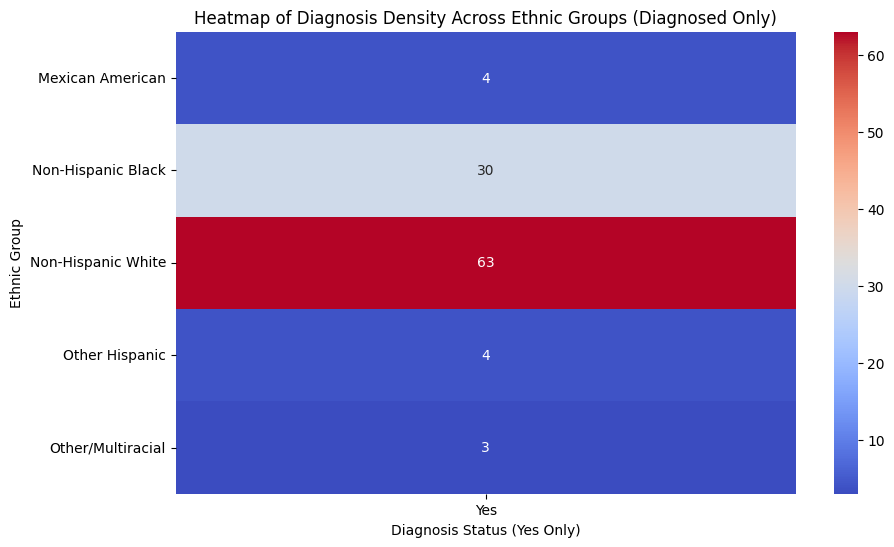

In [ ]:
filtered_merged_df_race_diagnosis_cleaned = filtered_merged_df_race_diagnosis_cleaned.copy()

filtered_merged_df_race_diagnosis_cleaned.loc[:, 'Diagnosed'] = filtered_merged_df_race_diagnosis_cleaned['RHQ360'].map({1: 'Yes', 2: 'No'})
filtered_merged_df_race_diagnosis_cleaned.loc[:, 'Ethnic Group'] = filtered_merged_df_race_diagnosis_cleaned['RIDRETH1'].map({
    1: 'Mexican American',
    2: 'Other Hispanic',
    3: 'Non-Hispanic White',
    4: 'Non-Hispanic Black',
    5: 'Other/Multiracial'})

# Filter for only 'Yes' diagnosis status
yes_diagnosis_df = filtered_merged_df_race_diagnosis_cleaned[filtered_merged_df_race_diagnosis_cleaned['Diagnosed'] == 'Yes']

# Create a pivot table for the heatmap
pivot_table = pd.crosstab(index=yes_diagnosis_df['Ethnic Group'], columns=yes_diagnosis_df['Diagnosed'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Diagnosis Density Across Ethnic Groups (Diagnosed Only)')
plt.ylabel('Ethnic Group')
plt.xlabel('Diagnosis Status (Yes Only)')
plt.show()

### 6.2c. Point Plot
This will calculate and plot the probablility of being diagnosed for each racial/ethinic group

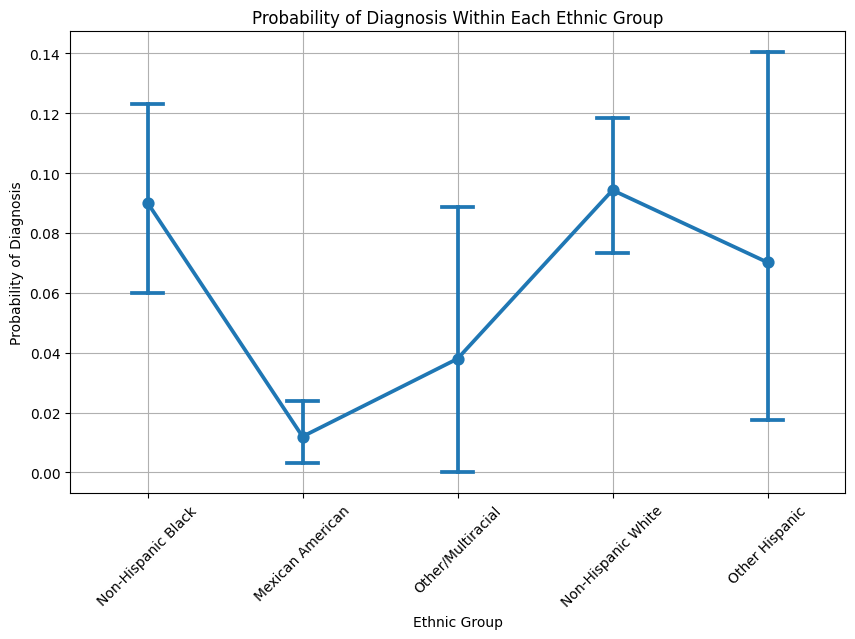

In [ ]:
filtered_merged_df_race_diagnosis_cleaned['Diagnosed'] = filtered_merged_df_race_diagnosis_cleaned['RHQ360'].map({1: 'Yes', 2: 'No'})
filtered_merged_df_race_diagnosis_cleaned['Ethnic Group'] = filtered_merged_df_race_diagnosis_cleaned['RIDRETH1'].map({1: 'Mexican American', 2: 'Other Hispanic', 3: 'Non-Hispanic White', 4: 'Non-Hispanic Black', 5: 'Other/Multiracial'})

# Calculate the probability of being diagnosed for each group
filtered_merged_df_race_diagnosis_cleaned['Diagnosed Binary'] = filtered_merged_df_race_diagnosis_cleaned['RHQ360'].apply(lambda x: 1 if x == 1 else 0)
grouped = filtered_merged_df_race_diagnosis_cleaned.groupby('Ethnic Group')['Diagnosed Binary'].agg(['mean', 'size', 'std'])

# Create point plot with Seaborn, which automatically calculates and shows confidence intervals
plt.figure(figsize=(10, 6))
sns.pointplot(data=filtered_merged_df_race_diagnosis_cleaned, x='Ethnic Group', y='Diagnosed Binary', capsize=.2)
plt.title('Probability of Diagnosis Within Each Ethnic Group')
plt.ylabel('Probability of Diagnosis')
plt.xlabel('Ethnic Group')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 6.3. Irregular Period vs. Endometriosis Diagnosis Visualization

### Data Preparation & Further Cleaning

In [ ]:
# plotting Period Regularity vs. Y/N diagnosed with endo
# plotting Period Reg. ('RHQ031') vs. Y/N diagnosed ('RHQ360')
columns_diagnosed = ['SEQN', 'RHQ360']
df_diagnosed = df_reproductive[columns_diagnosed]
#print(df_diagnosed)

columns_period = ['SEQN', 'RHQ031']
df_period = df_reproductive[columns_period]
#print(df_period)

merged_df_period_diagnosis = pd.merge(df_diagnosed, df_period, on='SEQN', how='outer')
#print(merged_df_period_diagnosis)

#drop NaN values from merged df
merged_df_period_diagnosis_cleaned = merged_df_period_diagnosis.dropna(subset=['RHQ360', 'RHQ031'])

# remove refused ("7") or don't know ("9") diagnosis values
filtered_merged_df_period_diagnosis_cleaned = merged_df_period_diagnosis_cleaned[~merged_df_period_diagnosis_cleaned['RHQ360'].isin([7, 9])]
filtered_merged_df_period_diagnosis_cleaned = merged_df_period_diagnosis_cleaned[~merged_df_period_diagnosis_cleaned['RHQ031'].isin([7, 9])]
print(filtered_merged_df_period_diagnosis_cleaned)

       SEQN  RHQ360  RHQ031
1     31131     1.0     1.0
8     31152     2.0     1.0
9     31153     2.0     1.0
11    31160     2.0     1.0
18    31183     2.0     1.0
...     ...     ...     ...
3582  41434     2.0     1.0
3584  41438     2.0     1.0
3586  41447     2.0     1.0
3587  41449     2.0     1.0
3590  41459     2.0     1.0

[1479 rows x 3 columns]


### 6.3a. Contingency Table + Clustered Bar Chart
Visually separates different categories (diagnosed vs. not diagnosed) within each group of menstrual regularity, making it easy to compare directly.



Regular Period
Yes    60
No     44
Name: count, dtype: int64


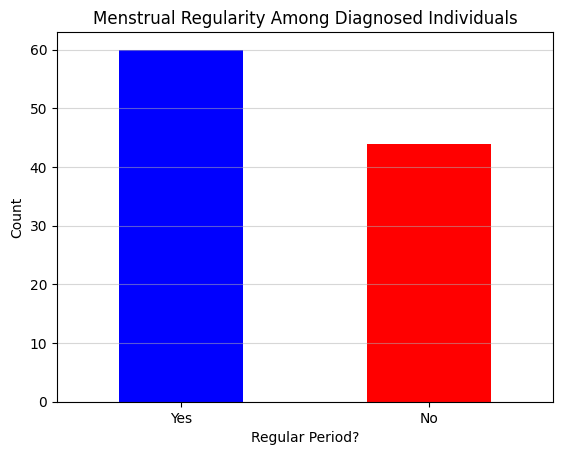

In [ ]:
# Filter to only include diagnosed individuals
# Filter to only include diagnosed individuals and create a copy to avoid SettingWithCopyWarning
df_diagnosed = filtered_merged_df_period_diagnosis_cleaned[filtered_merged_df_period_diagnosis_cleaned['RHQ360'] == 1].copy()

# Map numbers to more descriptive labels
df_diagnosed['Regular Period'] = df_diagnosed['RHQ031'].map({1: 'Yes', 2: 'No'})

# Count the frequency of regular vs. irregular periods among diagnosed individuals
period_counts = df_diagnosed['Regular Period'].value_counts()
print(period_counts)

# Plotting the data
period_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Menstrual Regularity Among Diagnosed Individuals')
plt.xlabel('Regular Period?')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.5)  # Add horizontal grid lines for easier reading
plt.xticks(rotation=0)  # Horizontal labels for better readability
plt.show()

Regular Period
Yes    1175
No      192
Name: count, dtype: int64


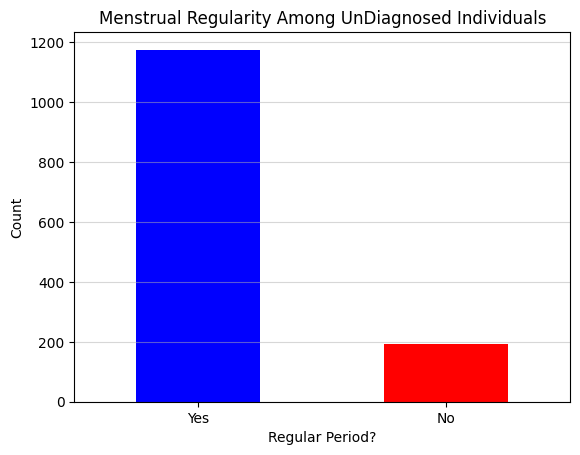

In [ ]:
# Filter to only include udiagnosed individuals and create a copy to avoid SettingWithCopyWarning
df_undiagnosed = filtered_merged_df_period_diagnosis_cleaned[filtered_merged_df_period_diagnosis_cleaned['RHQ360'] == 2].copy()

# Map numbers to more descriptive labels
df_undiagnosed['Regular Period'] = df_undiagnosed['RHQ031'].map({1: 'Yes', 2: 'No'})

# Count the frequency of regular vs. irregular periods among diagnosed individuals
period_counts = df_undiagnosed['Regular Period'].value_counts()
print(period_counts)

# Plotting the data
period_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Menstrual Regularity Among UnDiagnosed Individuals')
plt.xlabel('Regular Period?')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.5)  # Add horizontal grid lines for easier reading
plt.xticks(rotation=0)  # Horizontal labels for better readability
plt.show()

## 6.4. Times Pregnant vs. Endo Diagnosis

### Data Preparation & Further Cleaning

In [ ]:
# plotting Period Regularity vs. Y/N diagnosed with endo
# plotting Period Reg. ('RHQ031') vs. Y/N diagnosed ('RHQ360')
columns_diagnosed = ['SEQN', 'RHQ360']
df_diagnosed = df_reproductive[columns_diagnosed]
#print(df_diagnosed)

columns_times_pregnant = ['SEQN', 'RHQ160']
df_times_preg = df_reproductive[columns_times_pregnant]
#print(df_times_preg)

merged_df_preg_diagnosis = pd.merge(df_diagnosed, df_times_preg, on='SEQN', how='outer')
#print(merged_df_preg_diagnosis)

#drop NaN values from merged df
merged_df_preg_diagnosis_cleaned = merged_df_preg_diagnosis.dropna(subset=['RHQ360', 'RHQ160'])

# remove refused ("7") or don't know ("9") diagnosis values
filtered_merged_df_preg_diagnosis_cleaned = merged_df_preg_diagnosis_cleaned[~merged_df_preg_diagnosis_cleaned['RHQ360'].isin([7, 9])]
filtered_merged_df_preg_diagnosis_cleaned = filtered_merged_df_preg_diagnosis_cleaned[~merged_df_preg_diagnosis_cleaned['RHQ160'].isin([77, 99])]
print(filtered_merged_df_preg_diagnosis_cleaned)

       SEQN  RHQ360  RHQ160
1     31131     1.0     2.0
8     31152     2.0     4.0
9     31153     2.0     4.0
11    31160     2.0     4.0
19    31186     2.0     4.0
...     ...     ...     ...
3581  41428     1.0     5.0
3582  41434     2.0     4.0
3584  41438     2.0     1.0
3587  41449     2.0     3.0
3590  41459     2.0     1.0

[1235 rows x 3 columns]


<ipython-input-31-8a9c6a499190>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_merged_df_preg_diagnosis_cleaned = filtered_merged_df_preg_diagnosis_cleaned[~merged_df_preg_diagnosis_cleaned['RHQ160'].isin([77, 99])]


### 6.4a. Bar Graph


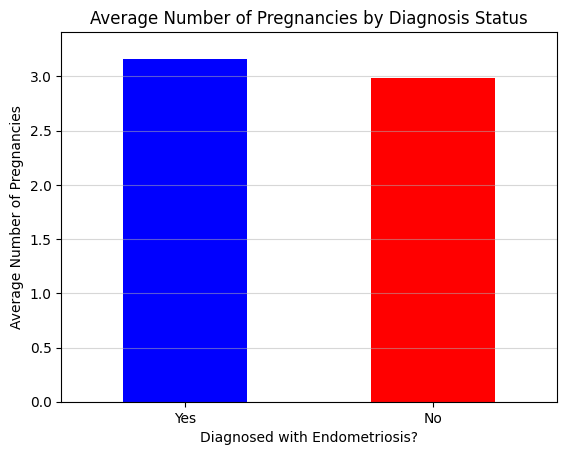

In [ ]:
filtered_merged_df_preg_diagnosis_cleaned['Diagnosed'] = filtered_merged_df_preg_diagnosis_cleaned['RHQ360'].map({1: 'Yes', 2: 'No'})

# Calculate average number of pregnancies for each group
average_pregnancies = filtered_merged_df_preg_diagnosis_cleaned.groupby('Diagnosed')['RHQ160'].mean()

# To ensure the order, sort the index if necessary
average_pregnancies = average_pregnancies.sort_index(ascending=False)  # 'Yes' will come before 'No' if sorted in descending order

colors = {'Yes': 'blue', 'No': 'red'}  # Assign colors correctly based on the new order
average_pregnancies.plot(kind='bar', color=[colors[x] for x in average_pregnancies.index])
plt.title('Average Number of Pregnancies by Diagnosis Status')
plt.xlabel('Diagnosed with Endometriosis?')
plt.ylabel('Average Number of Pregnancies')
plt.xticks(rotation=0)  # Keep the labels horizontal for better readability
plt.ylim(0, max(average_pregnancies) + 0.25)  # Set y-axis limits to show all data clearly
plt.grid(axis='y', alpha=0.5)  # Add horizontal grid lines for easier reading
plt.show()

## 6.5. Menstrual Regularity vs. Diagnosis

### Data Preparation & Further Cleaning

In [ ]:
# ToDo Final Project

# 7. Modeling



## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

X = dropped_df.iloc[:,2:10]
y = dropped_df.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=212)

Endo = LogisticRegression()
Endo.fit(X_train, y_train)

y_pred = Endo.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.97
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.97      1.00      0.98       194
         9.0       0.00      0.00      0.00         1

    accuracy                           0.97       200
   macro avg       0.32      0.33      0.33       200
weighted avg       0.94      0.97      0.96       200



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

## SKlearn Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=212)

clf= DecisionTreeClassifier(max_depth= 100)
clf= clf.fit(X_train, y_train)

y_pred= clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.925


In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print Model Parameters
print("\nModel Parameters:")
print(clf.get_params())

# Tree Characteristics
print("\nTree Characteristics:")
print(f"Depth of the tree: {clf.tree_.max_depth}")
print(f"Number of leaves: {clf.tree_.n_leaves}")

# Feature Importances (if your model includes them)
if hasattr(clf, 'feature_importances_'):
    print("\nFeature Importances:")
    for feature, importance in zip(X.columns, clf.feature_importances_):
        print(f"{feature}: {importance}")

Accuracy: 0.925
Confusion Matrix:
[[  1   4   0]
 [ 10 184   0]
 [  0   1   0]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.09      0.20      0.12         5
         2.0       0.97      0.95      0.96       194
         9.0       0.00      0.00      0.00         1

    accuracy                           0.93       200
   macro avg       0.35      0.38      0.36       200
weighted avg       0.95      0.93      0.94       200


Model Parameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 100, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}

Tree Characteristics:
Depth of the tree: 11
Number of leaves: 57

Feature Importances:
RHQ131: 0.0
RHD143: 0.0
RHD080: 0.24176209255332443
RHQ031: 0.0
RIDAGEMN: 0.317322478942756
WTINT2YR: 0.3967

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
pip install pycaret

## PyCaret Naive Bayes

In [ ]:
from pycaret.classification import *
exp_clf101 = setup(data = dropped_df, target= 'RHQ360', session_id=212)

,Description,Value
0,Session id,212
1,Target,RHQ360
2,Target type,Multiclass
3,Target mapping,"1.0: 0, 2.0: 1, 9.0: 2"
4,Original data shape,"(666, 10)"
5,Transformed data shape,"(666, 10)"
6,Transformed train set shape,"(466, 10)"
7,Transformed test set shape,"(200, 10)"
8,Numeric features,9
9,Preprocess,True


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9464,0.0000,0.9464,0.8959,0.9204,0.0000,0.0000,0.1020
ridge,Ridge Classifier,0.9464,0.0000,0.9464,0.8959,0.9204,0.0000,0.0000,0.1400
rf,Random Forest Classifier,0.9464,0.0000,0.9464,0.8959,0.9204,0.0000,0.0000,0.4380
ada,Ada Boost Classifier,0.9464,0.0000,0.9464,0.8959,0.9204,0.0000,0.0000,0.2800
dummy,Dummy Classifier,0.9464,0.0000,0.9464,0.8959,0.9204,0.0000,0.0000,0.0560
lr,Logistic Regression,0.9422,0.0000,0.9422,0.8957,0.9182,-0.0022,-0.0022,1.4970
et,Extra Trees Classifier,0.9422,0.0000,0.9422,0.8957,0.9182,-0.0022,-0.0022,0.3250
lda,Linear Discriminant Analysis,0.9357,0.0000,0.9357,0.8954,0.9150,-0.0073,-0.0079,0.1040
lightgbm,Light Gradient Boosting Machine,0.9357,0.0000,0.9357,0.8954,0.9150,-0.0123,-0.0131,1.1400
xgboost,Extreme Gradient Boosting,0.9336,0.0000,0.9336,0.8952,0.9139,-0.0145,-0.0163,0.1870


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
dt= create_model('dt')
print(dt)

In [ ]:
nb= create_model('nb')
print(nb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8936,0.0000,0.8936,0.9139,0.9037,-0.0352,-0.0364
1,0.8723,0.0000,0.8723,0.8723,0.8723,-0.0682,-0.0682
2,0.8298,0.0000,0.8298,0.8693,0.8491,-0.0867,-0.0901
3,0.8085,0.0000,0.8085,0.8677,0.8370,-0.0763,-0.0826
4,0.8298,0.0000,0.8298,0.8693,0.8491,-0.0682,-0.0709
5,0.7447,0.0000,0.7447,0.8623,0.7992,-0.0867,-0.1051
6,0.7391,0.0000,0.7391,0.9034,0.8130,-0.0739,-0.1054
7,0.8913,0.0000,0.8913,0.9419,0.9127,0.2384,0.2680
8,0.7391,0.0000,0.7391,0.9034,0.8130,-0.0739,-0.1054


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)


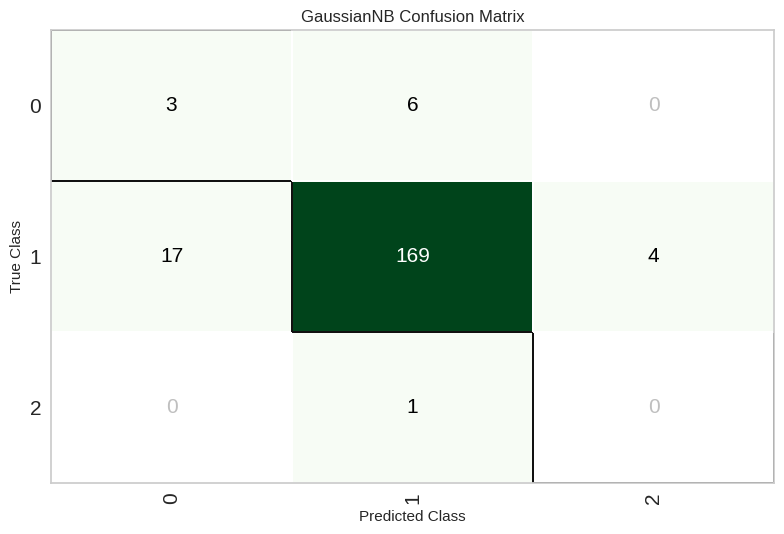

In [ ]:
plot_model(nb, plot = 'confusion_matrix')